In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [58]:
data = sns.load_dataset('iris')
data['species']=LabelEncoder().fit_transform(data['species'])
df = data[['sepal_length','sepal_width','species']]
df.rename(columns={
    'sepal_length' : 'X',
    'sepal_width' : 'Y',
    'species':'class'
},inplace=True)
df = df.iloc[:100,:]
df['class'].value_counts()

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_25332\2548039824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


class
0    50
1    50
Name: count, dtype: int64

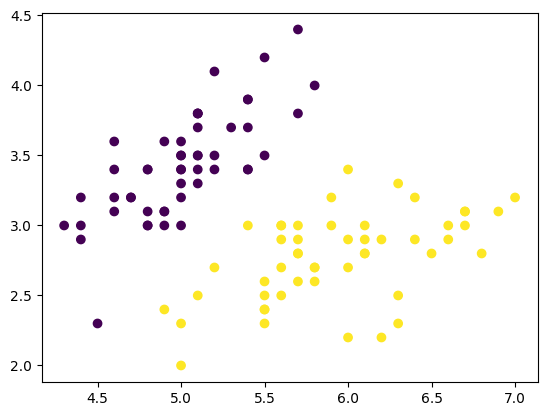

In [59]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [35]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [36]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [37]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Set parameters to 0
model.get_weights()

[array([[-0.9768455 , -0.7179942 ],
        [ 0.52250123,  0.4905361 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.5528395],
        [-0.6759822]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
initial_weights = model.get_weights()

In [47]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [49]:
model.set_weights(initial_weights)

In [51]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [54]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 111ms/step - loss: 0.6930 - accuracy: 0.6250 - val_loss: 0.6958 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6923 - accuracy: 0.6250 - val_loss: 0.6984 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6918 - accuracy: 0.6250 - val_loss: 0.7009 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6911 - accuracy: 0.6250 - val_loss: 0.7033 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6904 - accuracy: 0.6250 - val_loss: 0.7056 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6900 - accuracy: 0.6250 - val_loss: 0.7081 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6893 - accuracy: 0.6250 - val_loss: 0.7105 - val_accuracy: 0.

In [56]:
model.get_weights()

[array([[0.05455059, 0.05455059],
        [0.28318316, 0.28318316]], dtype=float32),
 array([0.19710332, 0.19710332], dtype=float32),
 array([[-0.1696403],
        [-0.1696403]], dtype=float32),
 array([-0.14759381], dtype=float32)]

9600/9600 [==============================] - 13s 1ms/step


c:\Users\Gyanprakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

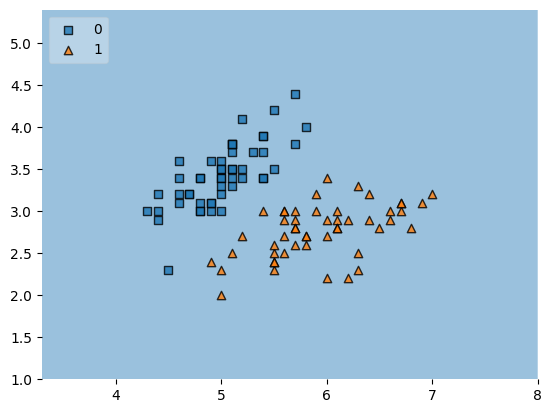

In [57]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)